# About

On this notebook we setup the last and complete steps for the pipeline.

In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
# Definitions

REGION = "BuenosAiresCityCenter"

In [41]:
from tqdm import tqdm
tqdm.pandas()

import tools
import settings

settings.CONSTANTS.DEFAULT_CELL_SIZE_METERS = 50

In [42]:
subset = tools.load_subset(REGION)
subset

Subset BuenosAiresCityCenter loaded with 7906 entries.


,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code
0,-34.609757,-58.372732,137.1630,0.7771,"POLYGON((-58.3726862870237 -34.6098345100679, ...",48Q39JRG+3WRP
1,-34.603312,-58.388291,23.7655,0.6978,"POLYGON((-58.3882617432414 -34.6033316833177, ...",48Q39JW6+MMGG
2,-34.606673,-58.383463,214.7212,0.7673,"POLYGON((-58.3834292 -34.6067809, -58.3834344 ...",48Q39JV8+8JM2
3,-34.606241,-58.379755,218.6224,0.8731,"POLYGON((-58.379693575366 -34.6063442145165, -...",48Q39JVC+G359
4,-34.602622,-58.378206,58.4525,0.7160,"POLYGON((-58.3781694893224 -34.6026622967781, ...",48Q39JWC+XP33
...,...,...,...,...,...,...
7901,-34.612691,-58.378285,99.3895,0.8269,"POLYGON((-58.3782097 -34.6127214, -58.3782147 ...",48Q39JPC+WMG9
7902,-34.598224,-58.387981,197.2301,0.7845,"POLYGON((-58.3879143732371 -34.5982830493679, ...",48Q3CJ26+PR64
7903,-34.600833,-58.380258,37.6236,0.6620,"POLYGON((-58.3802248917167 -34.600861126517, -...",48Q39JX9+MV9Q
7904,-34.611618,-58.389089,76.9883,0.7808,"POLYGON((-58.3890316865193 -34.6116508772852, ...",48Q39JQ6+9936


In [43]:
# We transform data types and create the geopandas dataframe
subset = tools.convert_to_gpd(subset)
subset

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code
0,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((-58.37269 -34.60983, -58.37269 -34.6...",48Q39JRG+3WRP
1,-34.603312,-58.388291,23.7655,0.6978,"POLYGON ((-58.38826 -34.60333, -58.38827 -34.6...",48Q39JW6+MMGG
2,-34.606673,-58.383463,214.7212,0.7673,"POLYGON ((-58.38343 -34.60678, -58.38343 -34.6...",48Q39JV8+8JM2
3,-34.606241,-58.379755,218.6224,0.8731,"POLYGON ((-58.37969 -34.60634, -58.37972 -34.6...",48Q39JVC+G359
4,-34.602622,-58.378206,58.4525,0.7160,"POLYGON ((-58.37817 -34.60266, -58.37817 -34.6...",48Q39JWC+XP33
...,...,...,...,...,...,...
7901,-34.612691,-58.378285,99.3895,0.8269,"POLYGON ((-58.37821 -34.61272, -58.37821 -34.6...",48Q39JPC+WMG9
7902,-34.598224,-58.387981,197.2301,0.7845,"POLYGON ((-58.38791 -34.59828, -58.38792 -34.5...",48Q3CJ26+PR64
7903,-34.600833,-58.380258,37.6236,0.6620,"POLYGON ((-58.38022 -34.60086, -58.38023 -34.6...",48Q39JX9+MV9Q
7904,-34.611618,-58.389089,76.9883,0.7808,"POLYGON ((-58.38903 -34.61165, -58.38903 -34.6...",48Q39JQ6+9936


<Axes: >

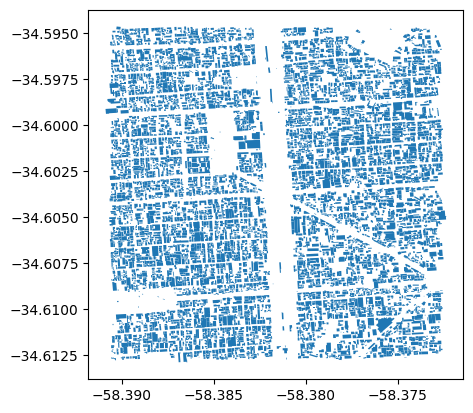

In [44]:
# We check the visualization of the data
subset.plot() # This could take a while for big subsets.

In [45]:
long_area_center, lat_area_center = tools.get_area_center(subset)
print(f"Center of the area: {long_area_center}, {lat_area_center}")

Center of the area: -58.38159822, -34.603723405


In [46]:
# We add the relative to area center positions in terms of cells and cell size

subset = tools.add_derivate_columns(subset)
subset

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,relative_lat,relative_lon,cell_long_pos,cell_lat_pos,size_in_cells
0,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((-58.37269 -34.60983, -58.37269 -34.6...",48Q39JRG+3WRP,-0.006033,0.008866,19,-14,1
1,-34.603312,-58.388291,23.7655,0.6978,"POLYGON ((-58.38826 -34.60333, -58.38827 -34.6...",48Q39JW6+MMGG,0.000412,-0.006692,-15,0,1
2,-34.606673,-58.383463,214.7212,0.7673,"POLYGON ((-58.38343 -34.60678, -58.38343 -34.6...",48Q39JV8+8JM2,-0.002949,-0.001865,-5,-7,1
3,-34.606241,-58.379755,218.6224,0.8731,"POLYGON ((-58.37969 -34.60634, -58.37972 -34.6...",48Q39JVC+G359,-0.002518,0.001844,4,-6,1
4,-34.602622,-58.378206,58.4525,0.7160,"POLYGON ((-58.37817 -34.60266, -58.37817 -34.6...",48Q39JWC+XP33,0.001102,0.003393,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...
7901,-34.612691,-58.378285,99.3895,0.8269,"POLYGON ((-58.37821 -34.61272, -58.37821 -34.6...",48Q39JPC+WMG9,-0.008968,0.003314,7,-20,1
7902,-34.598224,-58.387981,197.2301,0.7845,"POLYGON ((-58.38791 -34.59828, -58.38792 -34.5...",48Q3CJ26+PR64,0.005499,-0.006383,-15,12,1
7903,-34.600833,-58.380258,37.6236,0.6620,"POLYGON ((-58.38022 -34.60086, -58.38023 -34.6...",48Q39JX9+MV9Q,0.002891,0.001341,2,6,1
7904,-34.611618,-58.389089,76.9883,0.7808,"POLYGON ((-58.38903 -34.61165, -58.38903 -34.6...",48Q39JQ6+9936,-0.007895,-0.007491,-17,-18,1


In [47]:
# Now we create the cells grid

poly_grid = tools.create_grid(subset)

100%|██████████| 40/40 [00:00<00:00, 404.66it/s]


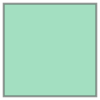

In [48]:
poly_grid[0][0]

In [49]:
# We add overlapping column to each building

subset = tools.add_overlapping_cells(subset, poly_grid)
subset

100%|██████████| 7906/7906 [00:01<00:00, 4533.94it/s]


,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,relative_lat,relative_lon,cell_long_pos,cell_lat_pos,size_in_cells,overlapping
0,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((-58.37269 -34.60983, -58.37269 -34.6...",48Q39JRG+3WRP,-0.006033,0.008866,19,-14,1,"[{'cell_long_pos': 19, 'cell_lat_pos': -14, 'a..."
1,-34.603312,-58.388291,23.7655,0.6978,"POLYGON ((-58.38826 -34.60333, -58.38827 -34.6...",48Q39JW6+MMGG,0.000412,-0.006692,-15,0,1,"[{'cell_long_pos': -15, 'cell_lat_pos': 0, 'ar..."
2,-34.606673,-58.383463,214.7212,0.7673,"POLYGON ((-58.38343 -34.60678, -58.38343 -34.6...",48Q39JV8+8JM2,-0.002949,-0.001865,-5,-7,1,"[{'cell_long_pos': -5, 'cell_lat_pos': -7, 'ar..."
3,-34.606241,-58.379755,218.6224,0.8731,"POLYGON ((-58.37969 -34.60634, -58.37972 -34.6...",48Q39JVC+G359,-0.002518,0.001844,4,-6,1,"[{'cell_long_pos': 3, 'cell_lat_pos': -6, 'are..."
4,-34.602622,-58.378206,58.4525,0.7160,"POLYGON ((-58.37817 -34.60266, -58.37817 -34.6...",48Q39JWC+XP33,0.001102,0.003393,7,2,1,"[{'cell_long_pos': 7, 'cell_lat_pos': 2, 'area..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7901,-34.612691,-58.378285,99.3895,0.8269,"POLYGON ((-58.37821 -34.61272, -58.37821 -34.6...",48Q39JPC+WMG9,-0.008968,0.003314,7,-20,1,"[{'cell_long_pos': 7, 'cell_lat_pos': -20, 'ar..."
7902,-34.598224,-58.387981,197.2301,0.7845,"POLYGON ((-58.38791 -34.59828, -58.38792 -34.5...",48Q3CJ26+PR64,0.005499,-0.006383,-15,12,1,"[{'cell_long_pos': -15, 'cell_lat_pos': 12, 'a..."
7903,-34.600833,-58.380258,37.6236,0.6620,"POLYGON ((-58.38022 -34.60086, -58.38023 -34.6...",48Q39JX9+MV9Q,0.002891,0.001341,2,6,1,"[{'cell_long_pos': 2, 'cell_lat_pos': 6, 'area..."
7904,-34.611618,-58.389089,76.9883,0.7808,"POLYGON ((-58.38903 -34.61165, -58.38903 -34.6...",48Q39JQ6+9936,-0.007895,-0.007491,-17,-18,1,"[{'cell_long_pos': -17, 'cell_lat_pos': -18, '..."


In [50]:
# We check that any building is in a cell
assert (subset["overlapping"].apply(lambda x: len(x)) == 0).sum() == 0, "There are buildings that are not in any cell"

In [51]:
intersections = tools.build_intersections_df(subset)
intersections

,cell_long_pos,cell_lat_pos,area,polygon_tag,fraction_of_the_building,fraction_over_buildings_in_cell
0,19,-14,1.347860e-08,48Q39JRG+3WRP,1.000000,0.128255
1,-15,0,2.335188e-09,48Q39JW6+MMGG,1.000000,0.023900
2,-5,-7,1.942712e-08,48Q39JV8+8JM2,0.920750,0.204942
3,-4,-7,1.672113e-09,48Q39JV8+8JM2,0.079250,0.025252
4,3,-6,9.604926e-10,48Q39JVC+G359,0.044711,0.015153
...,...,...,...,...,...,...
12944,2,6,2.260734e-09,48Q39JX9+MV9Q,0.611544,0.023363
12945,3,6,1.436027e-09,48Q39JX9+MV9Q,0.388456,0.012997
12946,-17,-18,7.565580e-09,48Q39JQ6+9936,1.000000,0.086832
12947,-13,-11,1.445123e-09,48Q39JR7+P483,0.725464,0.009672


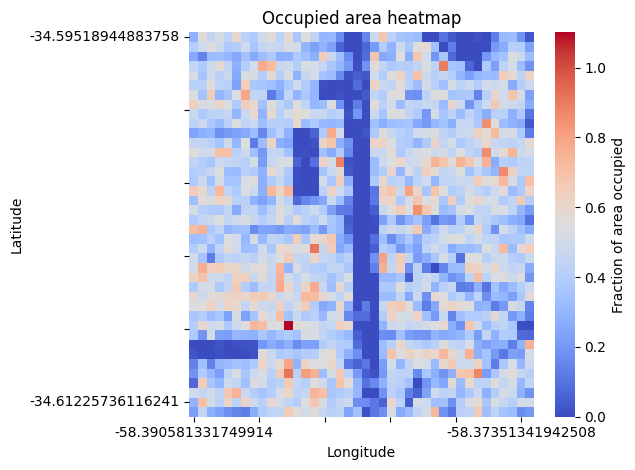

In [52]:
tools.plot_occupied_area_heatmap(intersections, lat_area_center=lat_area_center, long_area_center=long_area_center, save_as="test.png")

In [53]:
cell_composition = tools.build_cell_composition(intersections)
cell_composition

cell_composition
cell_long_pos cell_lat_pos                                                   
-20           -20           [{'polygon_tag': '48Q39JQ5+3QHV', 'fraction_ov...
              -19           [{'polygon_tag': '48Q39JQ5+4R6G', 'fraction_ov...
              -18           [{'polygon_tag': '48Q39JQ5+7RVG', 'fraction_ov...
              -17           [{'polygon_tag': '48Q39JQ5+GW53', 'fraction_ov...
              -16           [{'polygon_tag': '48Q39JQ5+MR2X', 'fraction_ov...
...                                                                       ...
 19            15           [{'polygon_tag': '48Q3CJ3G+6W26', 'fraction_ov...
               16           [{'polygon_tag': '48Q3CJ3G+CR55', 'fraction_ov...
               17           [{'polygon_tag': '48Q3CJ3G+JVJ2', 'fraction_ov...
               18           [{'polygon_tag': '48Q3CJ3G+QV8G', 'fraction_ov...
               19           [{'polygon_tag': '48Q3CJ3G+WRF5', 'fraction_ov...

[1496 rows x 1 columns]

In [55]:
if -25 in cell_composition.index:
    if -25 in cell_composition.columns:
        cell_composition.loc[-25,-25].values 

In [56]:
cell_composition = tools.add_orientation_to_cells(cell_composition, subset)
cell_composition

100%|██████████| 1496/1496 [00:11<00:00, 134.91it/s]


cell_composition  \
cell_long_pos cell_lat_pos                                                      
-20           -20           [{'polygon_tag': '48Q39JQ5+3QHV', 'fraction_ov...   
              -19           [{'polygon_tag': '48Q39JQ5+4R6G', 'fraction_ov...   
              -18           [{'polygon_tag': '48Q39JQ5+7RVG', 'fraction_ov...   
              -17           [{'polygon_tag': '48Q39JQ5+GW53', 'fraction_ov...   
              -16           [{'polygon_tag': '48Q39JQ5+MR2X', 'fraction_ov...   
...                                                                       ...   
 19            15           [{'polygon_tag': '48Q3CJ3G+6W26', 'fraction_ov...   
               16           [{'polygon_tag': '48Q3CJ3G+CR55', 'fraction_ov...   
               17           [{'polygon_tag': '48Q3CJ3G+JVJ2', 'fraction_ov...   
               18           [{'polygon_tag': '48Q3CJ3G+QV8G', 'fraction_ov...   
               19           [{'polygon_tag': '48Q3CJ3G+WRF5', 'fraction_ov...   

                            orientation_angle  eccentricity  
cell_long_pos cell_lat_pos                                   
-20           -20                  166.029625      0.664714  
              -19                   94.793681      0.552622  
              -18                   93.703186      0.608657  
              -17                    2.058783      0.352994  
              -16                    3.476584      0.872473  
...                                       ...           ...  
 19            15                   96.365912      0.866487  
               16                   93.071817      0.445012  
               17                  123.400303      0.568909  
               18                  112.008864      0.885664  
               19                  106.377525      0.326777  

[1496 rows x 3 columns]

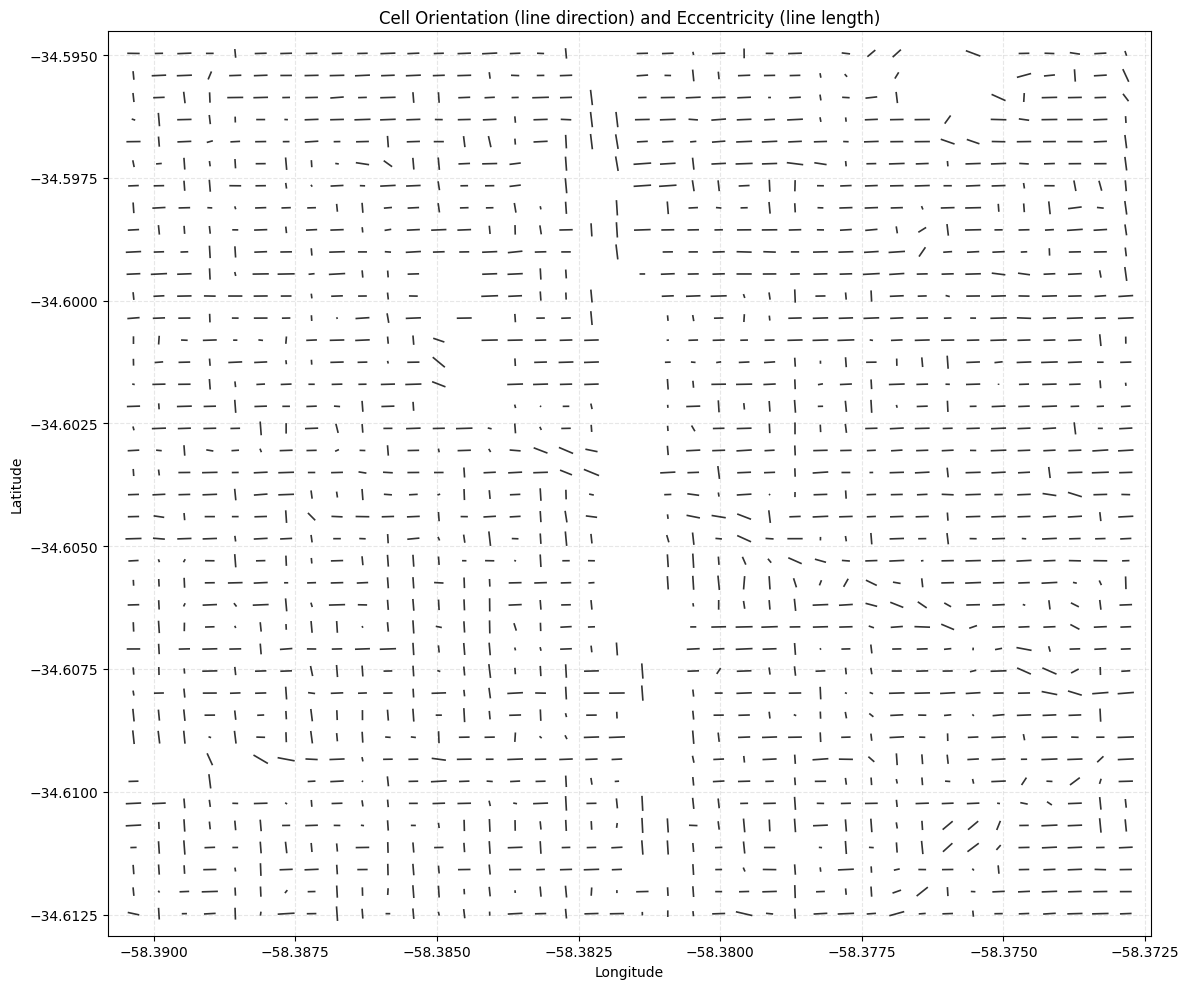

In [57]:
tools.plot_orientation_lines(cell_composition, lat_area_center=lat_area_center, long_area_center=long_area_center, save_as="test_orientation.png")